# Variable Definition Comment 

Variable	Definition	
id 	A unique id aligned with each comment text. 	
comment_text	It includes the comment text. 	
malignant	It is a column with binary values depicting which comments are malignant in nature. 	
highly_malignant	Binary column with labels for highly malignant text. 	
rude	Binary column with labels for comments that are rude in nature. 	
threat	Binary column with labels for threatening context in the comments. 	
abuse	Binary column with labels with abusive behaviour.	
loathe	Label to comments that are full of loathe and hatred. 	
		
There may be some comments which have multiple labels on them, i.e. some comments may be both malignant and loathe. 		
		
		
You are provided with a large number of comments which have been labeled by human raters for malignant behaviour. 		
The types are:	Malignant	
	Highly_malignant	
	Rude	
	Threat	
	Abuse	
	Loathe	
		
You must create a model to predict a probability of each type of toxicity for each comment. 		
		
		
	File Description	
		
train.csv	the training set which contains comments with their binary labels. 	
test.csv 	The test set for which the predictions are to be done. It includes id and comments_text. 	


# Malignant Comments Classifier Project

In [1]:
!pip install nltk

In [2]:
!pip install wordcloud

In [3]:
#Import relevant pacages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import string
import re
%matplotlib inline


from nltk.corpus import stopwords   #remove useless words
from nltk.stem.lancaster import LancasterStemmer  #convert words to base form; aggressive

#Import packages that us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [4]:
#in case there is a bug,just download stopwords again.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gautam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#Stopwords are a list of 'useless'words
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [6]:
#To view all rows in data
#pd.set_option('display.max_rows',None)

In [7]:
df=pd.read_csv("Malignant_train.csv")
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [8]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [9]:
df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [10]:
df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [11]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [12]:
df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [13]:
df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


# Let's see how the 1st to 3 comments looks like!

In [15]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [16]:
df['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [17]:
df['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

# Exploratory Data Analysis

In [18]:
df.malignant.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: malignant, dtype: float64

In [19]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [20]:
df_count=df.iloc[:,2:].sum()

In [21]:
df_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

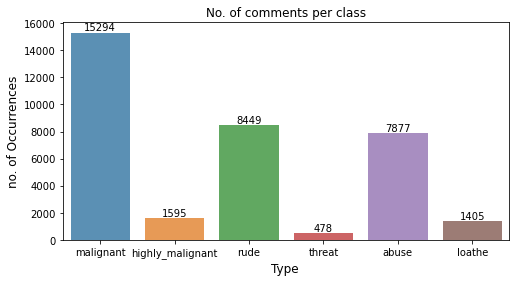

In [22]:
#plot a chart with the following size
plt.figure(figsize=(8,4))

#plot a bar chart using the index (categoty values) and the count of each category. alpha=0.8 to make the bars more trans
ax=sns.barplot(df_count.index,df_count.values,alpha=0.8)

plt.title("No. of comments per class")
plt.ylabel("no. of Occurrences",fontsize=12)
plt.xlabel("Type ",fontsize=12)

#adding the text labels for each bar
rects=ax.patches
labels=df_count.values
for rect,label in zip(rects,labels):
    height=rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2,height + 5,label, ha='center',va='bottom')
    
plt.show()

In [23]:
num_rows=len(df)
print(num_rows)

159571


In [24]:
df.shape

(159571, 8)

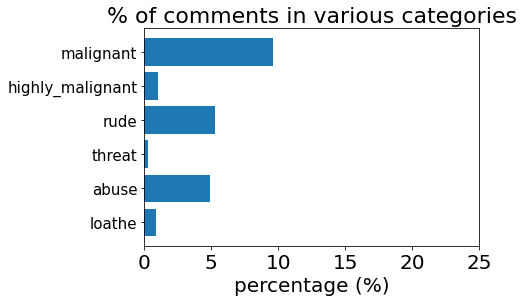

In [25]:
#create a bar graph
sum_malignant=df['malignant'].sum()/num_rows*100
sum_highly_malignant=df['highly_malignant'].sum()/num_rows*100
sum_rude=df['rude'].sum()/num_rows*100
sum_threat=df['threat'].sum()/num_rows*100
sum_abuse=df['abuse'].sum()/num_rows*100
sum_loathe=df['loathe'].sum()/num_rows*100

#Initiate a list of  values that represent the 6 x-axis values for the categories
ind=np.arange(6)

#let the ind variable be the x-axis, wheras the % of toxicity for each category be the y-axis.
#sequence of %have been sorted manually. This method cannot be done if there are large numbers of categories.
ax=plt.barh(ind,[sum_malignant,sum_highly_malignant,sum_rude,sum_threat,sum_abuse,sum_loathe])
plt.xlabel('percentage (%)',size=20)
plt.xticks(np.arange(0,30,5),size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('malignant','highly_malignant','rude','threat','abuse','loathe'),size=15)

#invert the graph so that it is in descending order..
plt.gca().invert_yaxis()
plt.show()

# preprocess the text

In [26]:
#text preprocessing steps- remove numbers, capital letters, punctuation, '\n'
import re
import string
#remove all numbers with letters attached to them
alphanumeric=lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
#.lower() - convert all strings to lovercase
punc_lower=lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ',x.lower())

#remove all '\n' in the string and replace it with a space
remove_n =lambda x: re.sub("\n", " ", x)

#remove all non-ascii characters
remove_non_ascii =lambda x: re.sub(r'[^\x00-\x7f]',r' ',x)

#apply all the lambda functions wrote previously through .map on the comments column
df['comment_text']=df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

df['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

# Separate our dataset into 6 sections. Each section is comment + 1 category.

In [27]:
df_malignant=df.loc[:,['id','comment_text','malignant']]

In [28]:
df_malignant['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [29]:
df_malignant['comment_text'][1]

'd aww  he matches this background colour i m seemingly stuck with  thanks    talk       january       utc '

In [30]:
df_highly_malignant=df.loc[:,['id','comment_text','highly_malignant']]

In [31]:
df_rude=df.loc[:,['id','comment_text','rude']]

In [32]:
df_threat=df.loc[:,['id','comment_text','threat']]

In [33]:
df_abuse=df.loc[:,['id','comment_text','abuse']]

In [34]:
df_loathe=df.loc[:,['id','comment_text','loathe']]

# Creating WordCloud

# useful to show the words which occur most frequently for each category. Warning:Profanity ahead.

In [35]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from nltk.corpus import stopwords

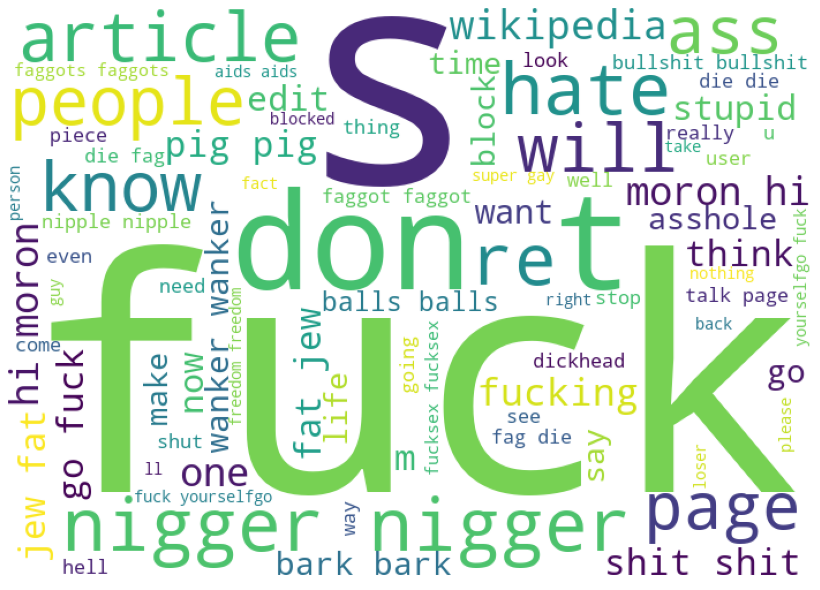

In [36]:
malig = df_malignant['comment_text'][df['malignant']==1]

malignant_cloud = WordCloud(width=700,height=500,background_color='white',max_words=80).generate(' '.join(malig))

plt.figure(figsize=(12,8))

plt.imshow(malignant_cloud)

plt.axis('off')

plt.tight_layout(pad=0)

plt.show()

In [37]:
df_malignant.head()

,id,comment_text,malignant
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0


In [38]:
df_malignant_1=df_malignant[df_malignant['malignant']== 1].iloc[0:5000,:]
df_malignant_1.shape

(5000, 3)

In [39]:
df_malignant_0=df_malignant[df_malignant['malignant']== 0].iloc[0:5000,:]

In [40]:
df_malignant_done=pd.concat([df_malignant_1,df_malignant_0],axis=0)
df_malignant_done.shape

(10000, 3)

# Not all categories have 5000 rows, So we should count them first and make them balanced

In [41]:
df_highly_malignant[df_highly_malignant['highly_malignant']==1].count()

id                  1595
comment_text        1595
highly_malignant    1595
dtype: int64

In [42]:
df_highly_malignant_1=df_highly_malignant[df_highly_malignant['highly_malignant']== 1].iloc[0:1595,:]
df_highly_malignant_0=df_highly_malignant[df_highly_malignant['highly_malignant']== 0].iloc[0:1595,:]
df_highly_malignant_done=pd.concat([df_highly_malignant_1,df_highly_malignant_0],axis=0)
df_highly_malignant_done.shape

(3190, 3)

In [43]:
df_rude[df_rude['rude']==1].count()

id              8449
comment_text    8449
rude            8449
dtype: int64

In [44]:
df_rude_1=df_rude[df_rude['rude']== 1].iloc[0:5000,:]
df_rude_0=df_rude[df_rude['rude']== 0].iloc[0:5000,:]
df_rude_done=pd.concat([df_rude_1,df_rude_0],axis=0)
df_rude_done.shape

(10000, 3)

In [45]:
df_threat[df_threat['threat']==1].count()

id              478
comment_text    478
threat          478
dtype: int64

In [46]:
df_threat_1=df_threat[df_threat['threat']== 1].iloc[0:478,:]
df_threat_0=df_threat[df_threat['threat']== 0].iloc[0:1912,:]
df_threat_done=pd.concat([df_threat_1,df_threat_0],axis=0)
df_threat_done.shape

(2390, 3)

In [47]:
df_abuse[df_abuse['abuse']==1].count()

id              7877
comment_text    7877
abuse           7877
dtype: int64

In [48]:
df_abuse_1=df_abuse[df_abuse['abuse']== 1].iloc[0:5000,:]
df_abuse_0=df_abuse[df_abuse['abuse']== 0].iloc[0:5000,:]
df_abuse_done=pd.concat([df_abuse_1,df_abuse_0],axis=0)
df_abuse_done.shape

(10000, 3)

In [49]:
df_loathe[df_loathe['loathe']==1].count()

id              1405
comment_text    1405
loathe          1405
dtype: int64

In [50]:
df_loathe_1=df_loathe[df_loathe['loathe']== 1].iloc[0:1405,:]
df_loathe_0=df_loathe[df_loathe['loathe']== 0].iloc[0:5620,:]
df_loathe_done=pd.concat([df_loathe_1,df_loathe_0],axis=0)
df_loathe_done.shape

(7025, 3)

Remainder: Number of comments that fall into the following categories:

malignant           15294

highly_malignant     1595

rude                 8449

threat                478

abuse                7877

loathe               1405

In [51]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [70]:
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


# Running ML models on the data

In [52]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

#import toolf to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

#import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Create simple function that takes ina dataset and allows user to choose dataset, toxicity label, vectorizer and number of ngrams

In [53]:
'''
df_done: data_tox_done, data_sev_done, ...  
label: toxic, severe_toxic, ... 
vectorizer values: CountVectorizer, TfidfVectorizer
gram_range values: (1,1) for unigram, (2,2) for bigram
'''
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    '''Train/test split'''
    #split the data into X and y data sets
    X=df_done.comment_text
    y=df_done[label]
    
    #split our data into training and test data
    X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=42)
    
    '''Count Vectorizer/TF-IDF'''
    
    #create a Vectorizer object and remove stopwords fom the table
    cv1=vectorizer(ngram_range=(ngram),stop_words='english')
    
    X_train_cv1=cv1.fit_transform(X_train)
    X_test_cv1=cv1.transform(X_test)
    
    #Output a Dataframe of the CountVectorizer with unique words as the labels
    #test=pd.DataFrame(X_train_cv1.toarray(),columns=cv1.get_feature_names())
    
    '''Initialize allmodel objects and fit the model on the training data'''
    lr=LogisticRegression()
    lr.fit(X_train_cv1,y_train)
    print('lr done')
    
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1,y_train)
    
    bnb=BernoulliNB()
    bnb.fit(X_train_cv1,y_train)
    print('bnb done')
    
    mnb=MultinomialNB()
    mnb.fit(X_train_cv1,y_train)
    print('mnb done')
    
    svm_model=LinearSVC()
    svm_model.fit(X_train_cv1,y_train)
    
    randomforest=RandomForestClassifier(n_estimators=100,random_state=42)
    randomforest.fit(X_train_cv1,y_train)
    print('rdf done')
    
    #Create a list of F1 score of all models
    f1_score_data={'F1 Score':[f1_score(lr.predict(X_test_cv1),y_test),f1_score(knn.predict(X_test_cv1),y_test),
                               f1_score(bnb.predict(X_test_cv1),y_test),f1_score(mnb.predict(X_test_cv1),y_test),
                               f1_score(svm_model.predict(X_test_cv1),y_test),f1_score(randomforest.predict(X_test_cv1),y_test)]}

    #Create DataFrame with the model names as column label
    df_f1=pd.DataFrame(f1_score_data,index=['Log Regression','KNN','BernoulliNB','MultinomialNB','SVM','Random Forest'])
    
    return df_f1

# Let's create a TF-IDF vectorizer object for each category and calculate the F1 scores across all models

In [54]:
'''
def cv_tf_train_test(df_done,label,vectorizer,ngram)
vectorizer values: CountVectorizer, TfidfVectorizer
ngram_range values: (1,1) for unigram, (2,2) for bigram
'''

import time

t0=time.time()

df_malignant_cv=cv_tf_train_test(df_malignant_done,'malignant',TfidfVectorizer,(1,1))
df_malignant_cv.rename(columns={'F1 Score': "F1 Score(malignant)"},inplace=True)

t1=time.time()

total='Time taken: {} seconds'.format(t1-t0)
print(total)

df_malignant_cv

#various permutations of the dataset, category, vectorizer and n-gram

# cv_tf_train_test(df_tox_done,'malignant',CountVectorizer,(1,1))
# cv_tf_train_test(df_tox_done,'highly_malignant',CountVectorizer,(1,1))
# cv_tf_train_test(df_tox_done,'rude',CountVectorizer,(1,1))
# cv_tf_train_test(df_tox_done,'threat',CountVectorizer,(1,1))
# cv_tf_train_test(df_tox_done,'abuse',CountVectorizer,(1,1))
# cv_tf_train_test(df_tox_done,'loathe',CountVectorizer,(1,1))

# cv_tf_train_test(df_tox_done,'malignant',TfidfVectorizer,(1,1))
# cv_tf_train_test(df_tox_done,'highly_malignant',TfidfVectorizer,(1,1))
# cv_tf_train_test(df_tox_done,'rude',TfidfVectorizer,(1,1))
# cv_tf_train_test(df_tox_done,'threat',TfidfVectorizer,(1,1))
# cv_tf_train_test(df_tox_done,'abuse',TfidfVectorizer,(1,1))
# cv_tf_train_test(df_tox_done,'loathe',TfidfVectorizer,(1,1))





lr done
bnb done
mnb done
rdf done
Time taken: 17.04464888572693 seconds


,F1 Score(malignant)
Log Regression,0.860941
KNN,0.170616
BernoulliNB,0.776521
MultinomialNB,0.874958
SVM,0.876510
Random Forest,0.835621


In [55]:
t0=time.time()

df_highly_malignant_cv=cv_tf_train_test(df_highly_malignant_done,'highly_malignant',TfidfVectorizer,(1,1))
df_highly_malignant_cv.rename(columns={'F1 Score': "F1 Score(highly_malignant)"},inplace=True)

t1=time.time()

total='Time taken: {} seconds'.format(t1-t0)
print(total)

df_highly_malignant_cv


lr done
bnb done
mnb done
rdf done
Time taken: 2.7947072982788086 seconds


,F1 Score(highly_malignant)
Log Regression,0.927879
KNN,0.837809
BernoulliNB,0.803707
MultinomialNB,0.936170
SVM,0.926004
Random Forest,0.927660


In [56]:
t0=time.time()

df_highly_malignant_cv=cv_tf_train_test(df_highly_malignant_done,'highly_malignant',TfidfVectorizer,(1,1))
df_highly_malignant_cv.rename(columns={'F1 Score': "F1 Score(highly_malignant)"},inplace=True)

t1=time.time()

total='Time taken: {} seconds'.format(t1-t0)
print(total)

df_highly_malignant_cv

lr done
bnb done
mnb done
rdf done
Time taken: 2.9745397567749023 seconds


,F1 Score(highly_malignant)
Log Regression,0.927879
KNN,0.837809
BernoulliNB,0.803707
MultinomialNB,0.936170
SVM,0.926004
Random Forest,0.927660


In [57]:
t0=time.time()

df_rude_cv=cv_tf_train_test(df_rude_done,'rude',TfidfVectorizer,(1,1))
df_rude_cv.rename(columns={'F1 Score': "F1 Score(rude)"},inplace=True)

t1=time.time()

total='Time taken: {} seconds'.format(t1-t0)
print(total)

df_rude_cv

lr done
bnb done
mnb done
rdf done
Time taken: 14.319663763046265 seconds


,F1 Score(rude)
Log Regression,0.908655
KNN,0.410982
BernoulliNB,0.787830
MultinomialNB,0.901399
SVM,0.921378
Random Forest,0.907370


In [58]:
t0=time.time()

df_threat_cv=cv_tf_train_test(df_threat_done,'threat',TfidfVectorizer,(1,1))
df_threat_cv.rename(columns={'F1 Score': "F1 Score(threat)"},inplace=True)

t1=time.time()

total='Time taken: {} seconds'.format(t1-t0)
print(total)

df_threat_cv

lr done
bnb done
mnb done
rdf done
Time taken: 2.0280492305755615 seconds


,F1 Score(threat)
Log Regression,0.628821
KNN,0.586207
BernoulliNB,0.311828
MultinomialNB,0.504762
SVM,0.786765
Random Forest,0.800000


In [59]:
t0=time.time()

df_abuse_cv=cv_tf_train_test(df_abuse_done,'abuse',TfidfVectorizer,(1,1))
df_abuse_cv.rename(columns={'F1 Score': "F1 Score(abuse)"},inplace=True)

t1=time.time()

total='Time taken: {} seconds'.format(t1-t0)
print(total)

df_abuse_cv

lr done
bnb done
mnb done
rdf done
Time taken: 14.6453218460083 seconds


,F1 Score(abuse)
Log Regression,0.896599
KNN,0.244898
BernoulliNB,0.783762
MultinomialNB,0.897411
SVM,0.902619
Random Forest,0.882616


In [60]:
t0=time.time()

df_loathe_cv=cv_tf_train_test(df_loathe_done,'loathe',TfidfVectorizer,(1,1))
df_loathe_cv.rename(columns={'F1 Score': "F1 Score(loathe)"},inplace=True)

t1=time.time()

total='Time taken: {} seconds'.format(t1-t0)
print(total)

df_loathe_cv

lr done
bnb done
mnb done
rdf done
Time taken: 8.147292852401733 seconds


,F1 Score(loathe)
Log Regression,0.699029
KNN,0.197980
BernoulliNB,0.549206
MultinomialNB,0.485857
SVM,0.797516
Random Forest,0.769821


In [61]:
#let's combine the dataframes into a master dataframe to compare F1 scores across all categories.
f1_all=pd.concat([df_malignant_cv,df_highly_malignant_cv,df_rude_cv,df_threat_cv,df_abuse_cv,df_loathe_cv],axis=1)
f1_all

,F1 Score(malignant),F1 Score(highly_malignant),F1 Score(rude),F1 Score(threat),F1 Score(abuse),F1 Score(loathe)
Log Regression,0.860941,0.927879,0.908655,0.628821,0.896599,0.699029
KNN,0.170616,0.837809,0.410982,0.586207,0.244898,0.197980
BernoulliNB,0.776521,0.803707,0.787830,0.311828,0.783762,0.549206
MultinomialNB,0.874958,0.936170,0.901399,0.504762,0.897411,0.485857
SVM,0.876510,0.926004,0.921378,0.786765,0.902619,0.797516
Random Forest,0.835621,0.927660,0.907370,0.800000,0.882616,0.769821


# Transpose the combined F1 dataframe to make it suitable for presentation on a graph

In [62]:
f1_all_trp=f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
F1 Score(malignant),0.860941,0.170616,0.776521,0.874958,0.876510,0.835621
F1 Score(highly_malignant),0.927879,0.837809,0.803707,0.936170,0.926004,0.927660
F1 Score(rude),0.908655,0.410982,0.787830,0.901399,0.921378,0.907370
F1 Score(threat),0.628821,0.586207,0.311828,0.504762,0.786765,0.800000
F1 Score(abuse),0.896599,0.244898,0.783762,0.897411,0.902619,0.882616
F1 Score(loathe),0.699029,0.197980,0.549206,0.485857,0.797516,0.769821


Text(0.5, 1.0, 'F1 Score of ML models (TF-IDF)')

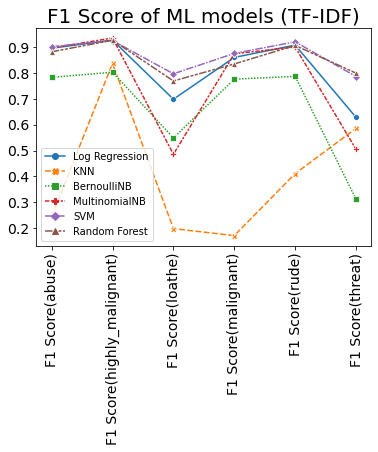

In [63]:
sns.lineplot(data=f1_all_trp, size=[10,10], markers=True)
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.title('F1 Score of ML models (TF-IDF)', fontsize=20)

#repeat this for CountVectorizer as well

# test if our code actually works. Probability of the comment falling in various categories should be output.

In [64]:
df_malignant_done.head()

,id,comment_text,malignant
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1
16,0007e25b2121310b,bye don t look come or think of comming ba...,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1


In [65]:
df2=pd.read_csv("Malignant_test.csv")
df2

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [66]:
X=df_malignant_done.comment_text
y=df_malignant_done['malignant']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#initiate a Tfidf vectorizer
tfv=TfidfVectorizer(ngram_range=(1,1),stop_words='english')

X_train_fit=tfv.fit_transform(X_train)

print(X_train_fit)
X_test_fit=tfv.transform(X_test)   #converts the X_test comments into Vectozised format

randomforest=RandomForestClassifier(n_estimators=100,random_state=42)

# Train our Random Forest model with X training data converted into Count Vectorized format with the Y training data
randomforest.fit(X_train_fit,y_train)
randomforest.predict(X_test_fit)

  (0, 22061)	0.2635530971419416
  (0, 9510)	0.14435471421275825
  (0, 22287)	0.10766750717439608
  (0, 5379)	0.231945916366186
  (0, 9581)	0.1608572995558464
  (0, 9957)	0.14599916725386247
  (0, 5539)	0.251887827144122
  (0, 4894)	0.21200400558825003
  (0, 18419)	0.15217827325444208
  (0, 7928)	0.16873155481467483
  (0, 20757)	0.2635530971419416
  (0, 23278)	0.19878321645564614
  (0, 7638)	0.19206209481031405
  (0, 12950)	0.12117680107791269
  (0, 21824)	0.251887827144122
  (0, 15795)	0.16865976015087217
  (0, 6041)	0.14504800307987611
  (0, 23935)	0.151880134878828
  (0, 14395)	0.1766551838556317
  (0, 6455)	0.13473968812689804
  (0, 7764)	0.22751098654220542
  (0, 23964)	0.37128446693031875
  (0, 6898)	0.31870944936710316
  (1, 8822)	0.6227013527818104
  (1, 3584)	0.32356776127350745
  :	:
  (6998, 24372)	0.16552163379962603
  (6998, 19092)	0.14732327464404366
  (6998, 6228)	0.2246772683339604
  (6998, 16778)	0.17407176265243082
  (6998, 261)	0.11626171073708377
  (6998, 245)	0.1150

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [67]:
#sample Prediction
comment1 = ['how are you doing today']
comment2 = ['fuck your self']
comment3 = ['son of bitch']

comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.18757237])

In [68]:
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([1.])

In [69]:
comment3_vect = tfv.transform(comment3)
randomforest.predict_proba(comment3_vect)[:,1]

array([1.])

Random forest has assigned a probability of that comment 2 ['fuck your self'] is toxic and Comment 1 ['how are you doing today'] has only a low toxic probability of 0.18.